In [1]:
import pandas as pd
import numpy as np


This dataset provides a detailed overview of cancer statistics across 51 states in the United States. It contains 75 columns, with each entry representing a state. The dataset is fully populated with no missing values. It includes overall cancer metrics such as the total cancer rate, the number of cancer cases, and the total population of each state. The data is further broken down by age groups (under 18, 18–45, 45–64, and over 64), gender within these age groups, and racial demographics such as White, Black, Asian, Indigenous, and Hispanic populations.

In addition to demographic breakdowns, the dataset provides information on major cancer types, including breast, colorectal, and lung cancer. These are categorized further by age, gender, and race, enabling detailed analyses of disparities and trends. The dataset is clean, with standardized column names, and free of duplicates or anomalies. It offers a rich resource for exploring cancer patterns, identifying high-risk demographics, and informing predictive modeling or policy decisions.

In [2]:
# Load the uploaded CSV file to inspect its structure
import pandas as pd

# Define the file path
file_path = 'cancer.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Display the first few rows and basic info about the dataset
data_head = data.head()
data_info = data.info()
data_describe = data.describe()

data_head, data_info, data_describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         51 non-null     object 
 1   Total.Rate                                    51 non-null     float64
 2   Total.Number                                  51 non-null     float64
 3   Total.Population                              51 non-null     float64
 4   Rates.Age.< 18                                51 non-null     float64
 5   Rates.Age.18-45                               51 non-null     float64
 6   Rates.Age.45-64                               51 non-null     float64
 7   Rates.Age.> 64                                51 non-null     float64
 8   Rates.Age and Sex.Female.< 18                 51 non-null     float64
 9   Rates.Age and Sex.Male.< 18                   51 non-null     float

(        State  Total.Rate  Total.Number  Total.Population  Rates.Age.< 18  \
 0     Alabama       214.2       71529.0        33387205.0             2.0   
 1      Alaska       128.1        6361.0         4966180.0             1.7   
 2     Arizona       165.6       74286.0        44845598.0             2.5   
 3    Arkansas       223.9       45627.0        20382448.0             2.3   
 4  California       150.9      393980.0       261135696.0             2.6   
 
    Rates.Age.18-45  Rates.Age.45-64  Rates.Age.> 64  \
 0             18.5            244.7          1017.8   
 1             11.8            170.9           965.2   
 2             13.6            173.6           840.2   
 3             17.6            250.1          1048.3   
 4             13.7            163.7           902.4   
 
    Rates.Age and Sex.Female.< 18  Rates.Age and Sex.Male.< 18  ...  \
 0                            2.0                          2.1  ...   
 1                            0.0                 

# Cleaning

This provides detailed cancer-related statistics for 51 states, containing 75 columns with no missing values. The data includes overall cancer metrics, such as the total number of cancer cases, the total population, and the overall cancer rate for each state. It also breaks down cancer rates by age groups (under 18, 18-45, 45-64, and over 64), gender within these age groups, and racial categories like White, Black, Asian, Indigenous, and Hispanic populations. Additionally, the dataset includes specific details on major cancer types such as breast, colorectal, and lung cancer, further categorized by age, sex, and race.

The dataset is clean and well-structured, with no duplicate entries or anomalies in key columns. Columns have been standardized for clarity, making them easy to interpret and analyze. This dataset offers a comprehensive view of cancer incidence across various demographics, providing an excellent foundation for exploring trends, performing analyses, and building predictive models. Would you like to dive deeper into any specific trends or start modeling?

In [3]:
# Step 1
duplicates = data.duplicated().sum()

# Step 2: Clean column names 
data.columns = data.columns.str.replace('< ', 'under_').str.replace('> ', 'over_')\
    .str.replace(' ', '_').str.replace('-', '_').str.replace('.', '_')

# Step 3
anomalies = { "Total_Rate": data['Total_Rate'].loc[(data['Total_Rate'] < 0) | (data['Total_Rate'] > 300)], "Total_Number": data['Total_Number'].loc[data['Total_Number'] < 0] }

# Step 4
cleaning_summary = {"duplicates_removed": duplicates, "anomalies_found": anomalies, "columns_cleaned": list(data.columns)}

cleaning_summary


{'duplicates_removed': 0,
 'anomalies_found': {'Total_Rate': Series([], Name: Total_Rate, dtype: float64),
  'Total_Number': Series([], Name: Total_Number, dtype: float64)},
 'columns_cleaned': ['State',
  'Total_Rate',
  'Total_Number',
  'Total_Population',
  'Rates_Age_under_18',
  'Rates_Age_18_45',
  'Rates_Age_45_64',
  'Rates_Age_over_64',
  'Rates_Age_and_Sex_Female_under_18',
  'Rates_Age_and_Sex_Male_under_18',
  'Rates_Age_and_Sex_Female_18___45',
  'Rates_Age_and_Sex_Male_18___45',
  'Rates_Age_and_Sex_Female_45___64',
  'Rates_Age_and_Sex_Male_45___64',
  'Rates_Age_and_Sex_Female_over_64',
  'Rates_Age_and_Sex_Male_over_64',
  'Rates_Race_White',
  'Rates_Race_White_non_Hispanic',
  'Rates_Race_Black',
  'Rates_Race_Asian',
  'Rates_Race_Indigenous',
  'Rates_Race_and_Sex_Female_White',
  'Rates_Race_and_Sex_Female_White_non_Hispanic',
  'Rates_Race_and_Sex_Female_Black',
  'Rates_Race_and_Sex_Female_Black_non_Hispanic',
  'Rates_Race_and_Sex_Female_Asian',
  'Rates_Race_

# Distribution of Total Cancer Rate:

This histogram provides a detailed look at the frequency distribution of total cancer rates across states. The distribution is roughly normal, with most states having a total cancer rate between 160 and 220. Outliers exist at both lower (below 140) and higher (above 240) cancer rate ranges, indicating variation among states. The peak frequency corresponds to states with cancer rates around 200, suggesting that this is a common benchmark for cancer incidence.

# Average Cancer Rates by Age Group:

This bar chart illustrates how cancer rates are distributed across different age groups. The chart clearly shows that cancer rates increase dramatically with age, with the over 64 age group having significantly higher rates compared to other groups. The cancer rate for this group approaches 1,000, indicating that older populations are at a much greater risk. Younger age groups, such as under 18 and 18-45, have relatively minimal cancer rates, emphasizing the correlation between aging and cancer incidence.

# Insights:
Older age groups (over 64) are the most vulnerable to cancer, as depicted by their disproportionately high rates.
Cancer rates vary significantly across states, with most falling within a central range around 200, but a few states exhibit exceptionally high or low rates.

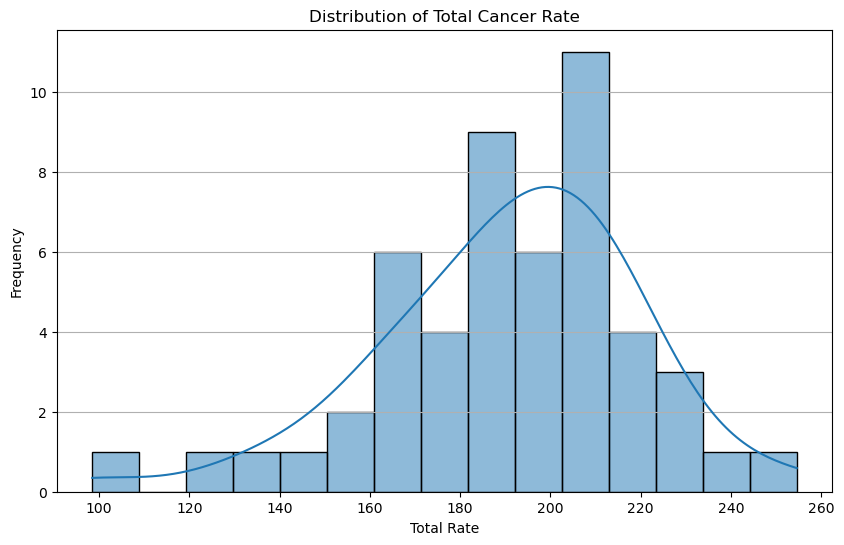

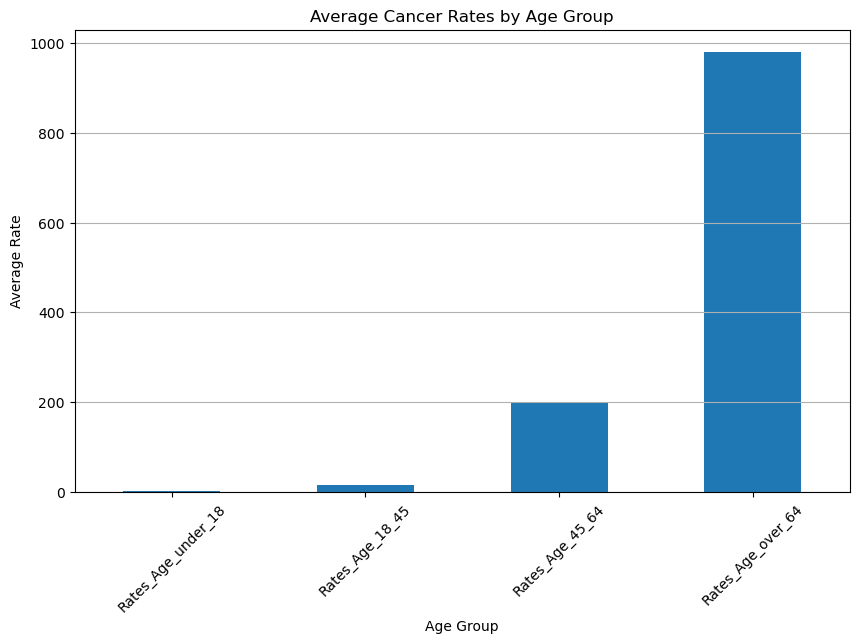

(       Total_Rate   Total_Number  Total_Population  Rates_Age_under_18  \
 count   51.000000      51.000000      5.100000e+01           51.000000   
 mean   190.656863   78723.725490      4.240151e+07            2.119608   
 std     28.592155   80861.292676      4.784244e+07            0.502004   
 min     98.500000    6361.000000      3.931624e+06            0.000000   
 25%    176.500000   20631.000000      1.186991e+07            2.050000   
 50%    196.100000   54930.000000      3.034806e+07            2.200000   
 75%    210.750000   93328.000000      4.650326e+07            2.400000   
 max    254.600000  393980.000000      2.611357e+08            2.700000   
 
        Rates_Age_18_45  Rates_Age_45_64  Rates_Age_over_64  \
 count        51.000000        51.000000          51.000000   
 mean         14.764706       197.576471         980.949020   
 std           2.204343        31.261040          75.189556   
 min          10.000000       132.300000         735.800000   
 25%    

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Basic Statistics Summary
basic_stats = data.describe()

# Step 2: Distribution of Total_Rate
plt.figure(figsize=(10, 6))
sns.histplot(data['Total_Rate'], kde=True, bins=15)
plt.title('Distribution of Total Cancer Rate')
plt.xlabel('Total Rate')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Step 3: Top 5 States with the Highest Total Rates
top_states = data[['State', 'Total_Rate']].sort_values(by='Total_Rate', ascending=False).head(5)

# Step 4: Rates by Age Group
age_rate_columns = ['Rates_Age_under_18', 'Rates_Age_18_45', 'Rates_Age_45_64', 'Rates_Age_over_64']
age_rate_means = data[age_rate_columns].mean()

plt.figure(figsize=(10, 6))
age_rate_means.plot(kind='bar')
plt.title('Average Cancer Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


basic_stats, top_states


# Heatmap 
The heatmap shows the correlations between various numeric features in the dataset, revealing how different factors like age, gender, race, and specific cancer types are related to overall cancer rates. Strong positive correlations (indicated by dark red areas) are evident between age-specific cancer rates, especially for older age groups (Rates_Age_over_64) and overall cancer rates (Total_Rate). This reinforces the idea that cancer incidence increases significantly with age. Similarly, strong correlations are observed among race-specific and sex-specific rates, such as between Rates_Race_White and Rates_Race_White_non_Hispanic. Negative correlations (shaded in blue) are seen between younger age groups (Rates_Age_under_18) and older groups, highlighting an inverse relationship in cancer incidence. Specific cancer types, like breast, colorectal, and lung cancer, show strong correlations with particular demographics, especially older populations. The intensity of the colors makes it easy to spot relationships—dark red indicates strong positive correlations, while dark blue highlights strong negative correlations. This heatmap is a useful tool for identifying patterns, understanding key drivers of cancer rates, and selecting relevant features for predictive modeling.

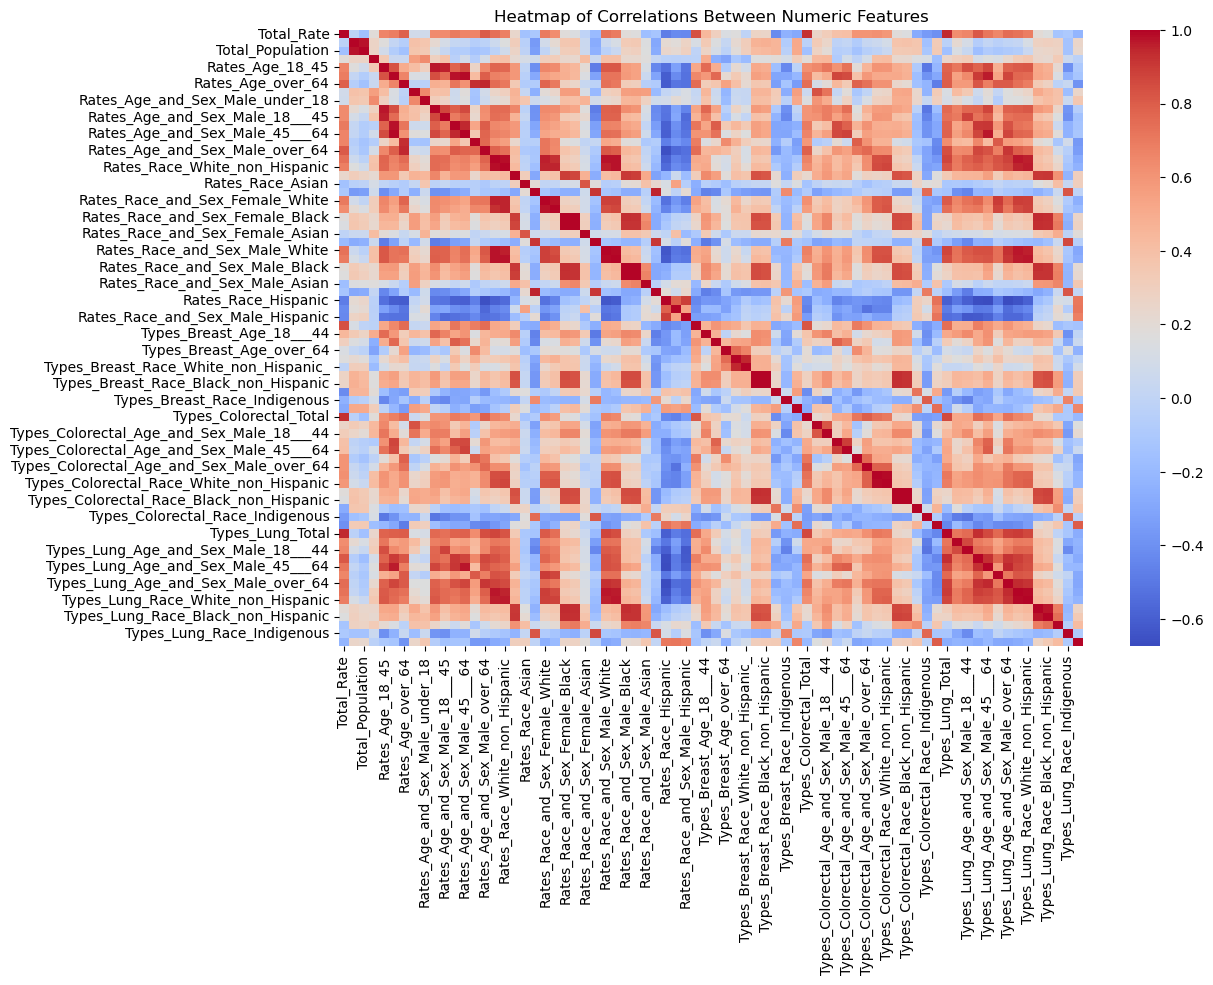

In [5]:
# Select only numeric columns for the correlation heatmap
numeric_data = data.select_dtypes(include='number')

# Regenerate the heatmap for correlations between numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=False, cbar=True)
plt.title('Heatmap of Correlations Between Numeric Features')
plt.show()


This snippet outlines the process of splitting a dataset into training and testing sets for machine learning. The dataset has already been preprocessed to handle missing values and ensure that features are properly scaled. Since there are no categorical features in the selected data subset, encoding was not necessary.

The train_test_split function from sklearn is used to divide the dataset. Here, the independent variables (features) are stored in X, while the target variable (Total_Rate) is stored in y. The data is split into 80% training data (X_train, y_train) and 20% testing data (X_test, y_test) to ensure the model can be trained and evaluated effectively. The random state is set to 42 to ensure the split is reproducible.

The result is:

Training set: 40 rows and 12 features.
Testing set: 11 rows and 12 features.
This setup ensures the model is trained on the majority of the data while retaining a separate portion for evaluating its performance. Let me know if you’d like to proceed with model training or further preprocessing!

In [7]:
from sklearn.model_selection import train_test_split
preprocessed_data = scaled_data.copy()
X = preprocessed_data.drop(columns=['Total_Rate'])  # Features
y = preprocessed_data['Total_Rate']                # Target variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
split_summary = { "X_train_shape": X_train.shape, "X_test_shape": X_test.shape, "y_train_shape": y_train.shape,"y_test_shape": y_test.shape } 
split_summary


{'X_train_shape': (40, 12),
 'X_test_shape': (11, 12),
 'y_train_shape': (40,),
 'y_test_shape': (11,)}

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# 2: 
rf_model.fit(X_train, y_train)

# 3:
y_pred = rf_model.predict(X_test)

# 4:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Summary of evaluation metrics
evaluation_metrics = { "Mean Absolute Error (MAE)": mae, "Mean Squared Error (MSE)": mse, "R-squared (R2)": r2 }

evaluation_metrics


{'Mean Absolute Error (MAE)': 3.16463636363638,
 'Mean Squared Error (MSE)': 16.4683844545453,
 'R-squared (R2)': 0.9730665865560718}

In [9]:
import joblib

# Save the trained model to a file
model_filename = 'random_forest_model.pkl'
joblib.dump(rf_model, model_filename)

model_filename


'random_forest_model.pkl'

The visualizations highlight two critical aspects of the Random Forest model's performance and feature importance.

The first plot, "Feature Importance of Random Forest Model," identifies which features had the most significant impact on predicting the total cancer rate. The feature Cancer_per_Capita stands out as the most important predictor, contributing significantly more than others. Other impactful features include Types_Lung_Total, Types_Breast_Total, and Types_Colorectal_Total, emphasizing the relevance of cancer-specific data in predicting the overall cancer rate. Age-related features such as Rates_Age_over_64 also play a notable role, underscoring the strong correlation between age and cancer prevalence. Less influential features include Total_Population and Rates_Age_under_18, which show minimal contributions.

The second plot, "Actual vs. Predicted Total Rate," evaluates the model's performance by comparing the actual and predicted values of the total cancer rate. The data points closely align along the red diagonal line, which represents perfect predictions, indicating that the model is highly accurate. This alignment demonstrates the effectiveness of the Random Forest Regressor in capturing the underlying patterns in the data and making precise predictions.

Together, these visualizations confirm the model's strong predictive performance and provide insights into the features driving its accuracy, making it a valuable tool for understanding and addressing cancer rates.


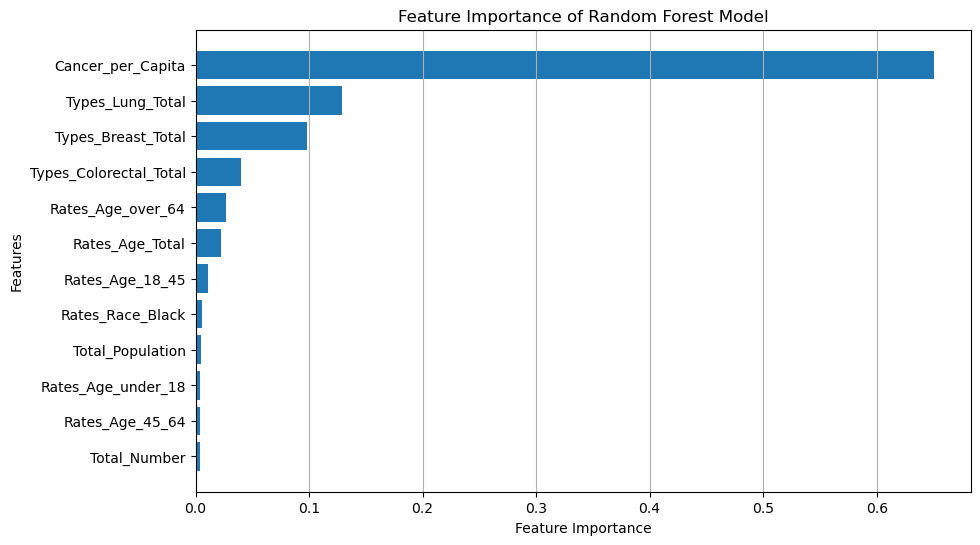

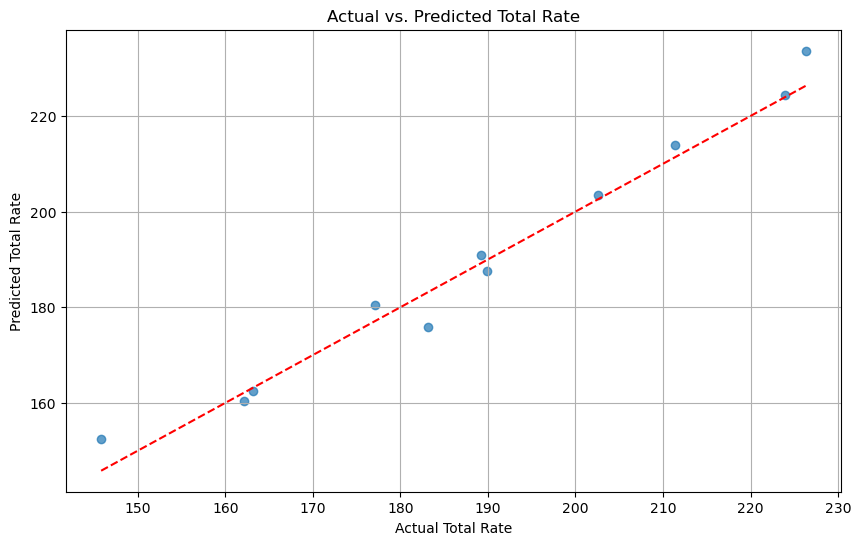

In [10]:
# 1
import matplotlib.pyplot as plt
import numpy as np

#
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

sorted_idx = np.argsort(feature_importances)
sorted_features = feature_names[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance of Random Forest Model")
plt.grid(axis="x")
plt.show()

# Step 2: Actual vs. Predicted Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Perfect prediction line
plt.xlabel("Actual Total Rate")
plt.ylabel("Predicted Total Rate")
plt.title("Actual vs. Predicted Total Rate")
plt.grid()
plt.show()


In [11]:
from sklearn.ensemble import GradientBoostingRegressor

# Step 1
gb_model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Step 2
gb_model.fit(X_train, y_train)

# Step 3
y_pred_gb = gb_model.predict(X_test)

# Step 4
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

evaluation_metrics_gb = { "Mean Absolute Error (MAE)": mae_gb, "Mean Squared Error (MSE)": mse_gb, "R-squared (R2)": r2_gb }

evaluation_metrics_gb


{'Mean Absolute Error (MAE)': 5.5440425225509,
 'Mean Squared Error (MSE)': 75.4876817696455,
 'R-squared (R2)': 0.8765427811916069}

# Average Cancer Rates by Age Group:
This bar chart shows a striking increase in cancer rates as age progresses. While the younger age groups (under 18 and 18-45) have negligible rates, there is a noticeable increase for the 45-64 group. The highest rates are observed in the over 64 group, with values nearing 1,000, highlighting the strong relationship between age and cancer incidence. This visualization underscores the vulnerability of older populations to cancer, emphasizing the need for targeted prevention and treatment strategies for seniors.
# Average Cancer Rates by Race:
The second chart highlights disparities in cancer rates among different racial groups. Black populations exhibit the highest average cancer rates, followed closely by White populations. Other groups, such as Asian, Indigenous, and Hispanic populations, show comparatively lower rates. However, Indigenous populations have slightly elevated rates compared to Asian and Hispanic groups. This visualization points to potential racial disparities in cancer incidence, suggesting the need for further investigation into socioeconomic, environmental, and genetic factors contributing to these differences.
# Conclusion:
These visualizations emphasize the impact of age and race on cancer rates. Older age groups and certain racial demographics, such as Black populations, are at higher risk, offering critical insights for public health interventions and resource allocation. Let me know if you'd like further analysis!

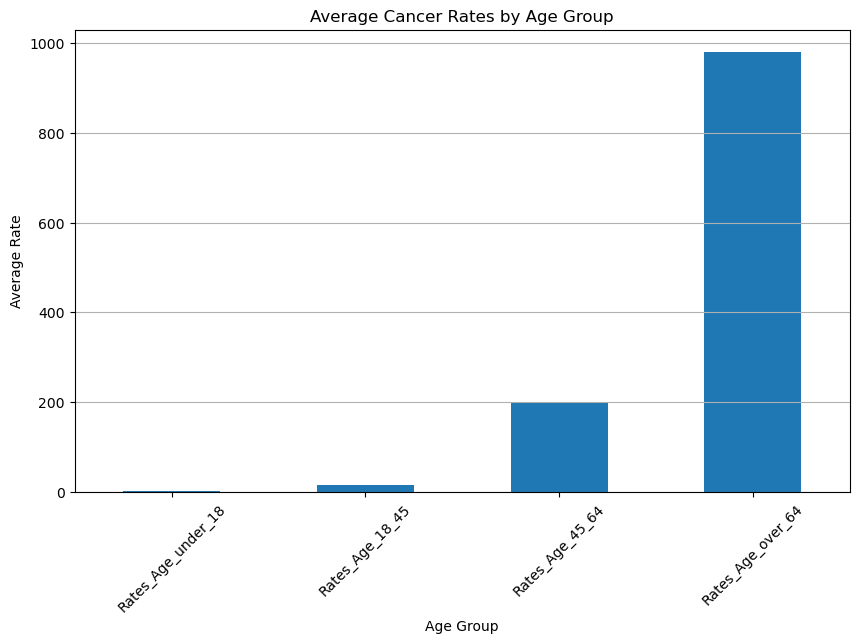

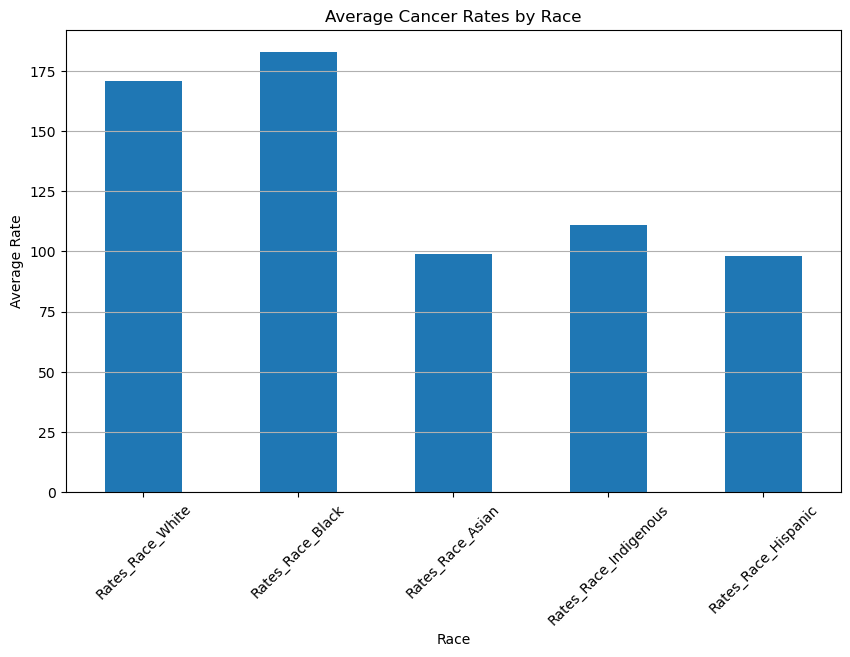

In [13]:
# Step 1: Analyze the distribution of cancer rates across different age groups
age_group_columns = ['Rates_Age_under_18', 'Rates_Age_18_45', 'Rates_Age_45_64', 'Rates_Age_over_64']
age_group_means = data[age_group_columns].mean()

# Plot the distribution of cancer rates by age group
plt.figure(figsize=(10, 6))
age_group_means.plot(kind='bar')
plt.title('Average Cancer Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



# Step 3: Analyze rates by race
race_columns = ['Rates_Race_White', 'Rates_Race_Black', 'Rates_Race_Asian', 'Rates_Race_Indigenous', 'Rates_Race_Hispanic']
race_means = data[race_columns].mean()

plt.figure(figsize=(10, 6))
race_means.plot(kind='bar')
plt.title('Average Cancer Rates by Race')
plt.xlabel('Race')
plt.ylabel('Average Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# States with the Highest Cancer Rates:

West Virginia stands out with the highest total cancer rate, followed by Maine, Pennsylvania, Kentucky, and Arkansas. These states have significantly elevated cancer rates, highlighting potential regional factors such as lifestyle, healthcare access, or environmental risks.
States with the Lowest Cancer Rates:

At the lower end of the spectrum, Utah, Alaska, Colorado, and Hawaii have the lowest cancer rates. These states may benefit from healthier lifestyles, lower smoking rates, or other protective factors.
General Trends:

The distribution shows a gradual decline in cancer rates from the highest-ranking states to the lowest. However, the gap between the highest (around 250) and lowest (under 150) rates is considerable, emphasizing disparities in cancer incidence across the country.

# Insights:
This visualization highlights the stark variation in cancer rates by state, offering valuable information for identifying regions where cancer prevention and treatment resources are most needed. It also suggests the importance of examining state-specific factors contributing to these differences, such as healthcare infrastructure, environmental exposures, and socioeconomic conditions. Let me know if you'd like to dive deeper into specific states or trends!








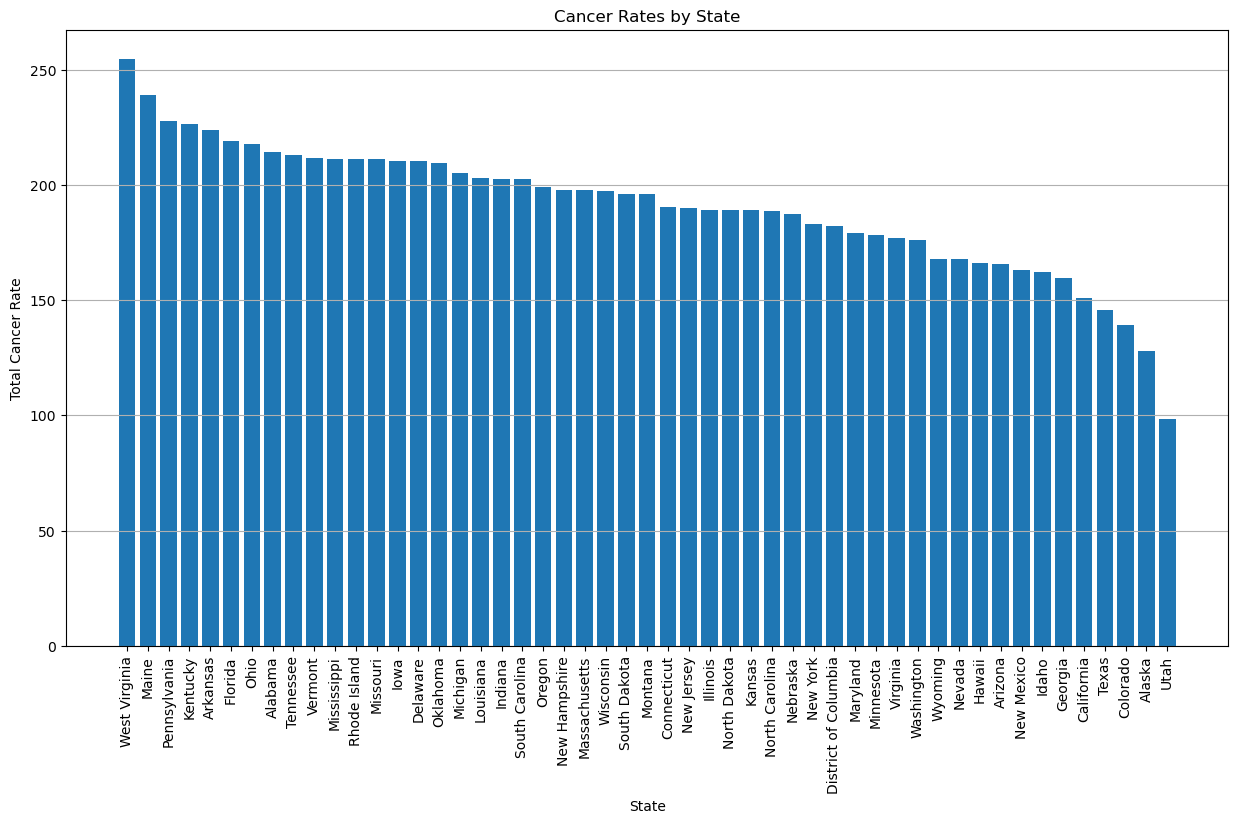

In [15]:
plt.figure(figsize=(15, 8))
data_sorted = data.sort_values(by='Total_Rate', ascending=False)
plt.bar(data_sorted['State'], data_sorted['Total_Rate'])
plt.title('Cancer Rates by State')
plt.xlabel('State')
plt.ylabel('Total Cancer Rate')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Average Rates of Different Cancer Types:
This bar chart shows that lung cancer has the highest average rate (53.21), significantly exceeding the rates of breast cancer (26.01) and colorectal cancer (17.50). The dominance of lung cancer highlights it as a critical focus area for prevention and treatment. The relatively lower rates of breast and colorectal cancers may reflect earlier detection methods and effective treatments but still indicate areas needing attention.
# Total Population vs. Total Cancer Rate:
The scatter plot reveals a weak negative correlation (-0.16) between total population and total cancer rate. This suggests that states with higher populations do not necessarily have higher cancer rates, implying that cancer incidence is influenced more by demographic, lifestyle, or environmental factors rather than population size alone.
# State with the Highest Cancer Rate:
West Virginia stands out with the highest total cancer rate (254.6), emphasizing it as a priority for further investigation and intervention. Factors such as smoking prevalence, healthcare access, and socioeconomic conditions may contribute to this elevated rate.


# Summary:
These insights underline the significance of lung cancer as a public health concern, the need for tailored interventions in specific states like West Virginia, and the nuanced relationship between population size and cancer rates. These findings provide a foundation for deeper exploration into the factors driving cancer incidence and targeted resource allocation. Let me know if you'd like further analysis or more visualizations!

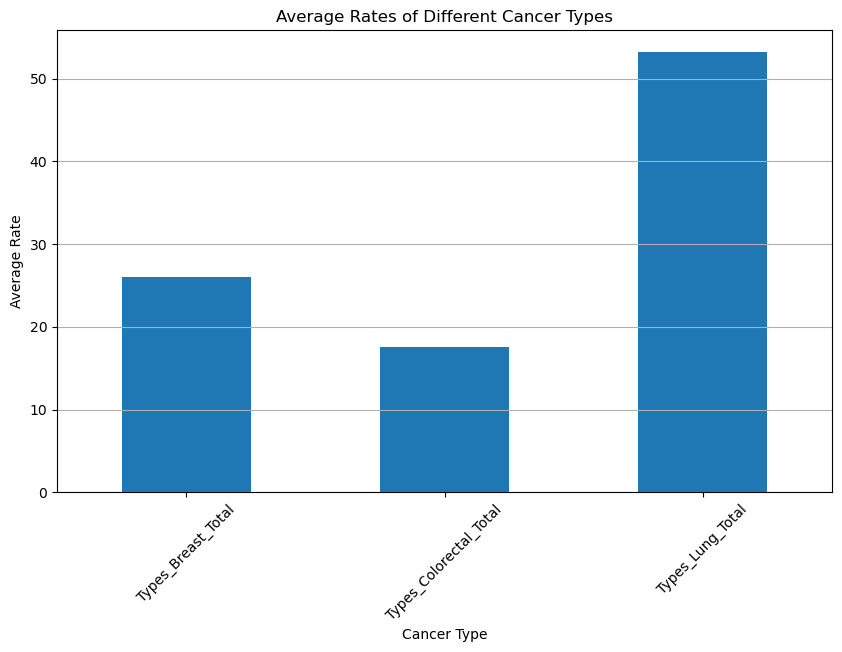

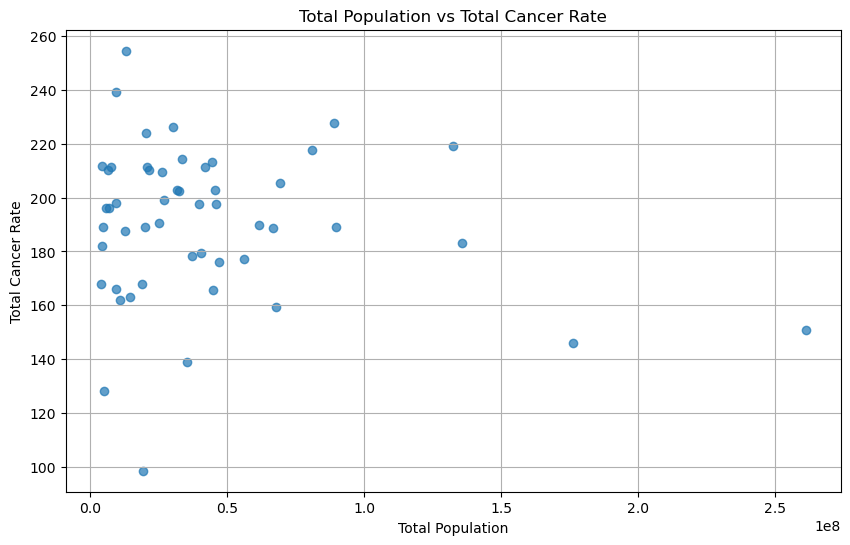

{'Average Cancer Rates by Type': {'Types_Breast_Total': 26.009803921568622,
  'Types_Colorectal_Total': 17.50392156862745,
  'Types_Lung_Total': 53.20588235294119},
 'Population vs Rate Correlation': -0.15759350769729674,
 'State with Highest Cancer Rate': {'State': 'West Virginia',
  'Total_Rate': 254.6}}

In [16]:
# Step 1: Cancer type analysis (Breast, Colorectal, Lung)
cancer_type_columns = ['Types_Breast_Total', 'Types_Colorectal_Total', 'Types_Lung_Total']
cancer_type_means = data[cancer_type_columns].mean()

# Plot the average rates of cancer types
plt.figure(figsize=(10, 6))
cancer_type_means.plot(kind='bar')
plt.title('Average Rates of Different Cancer Types')
plt.xlabel('Cancer Type')
plt.ylabel('Average Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Step 2: Correlation between population and cancer rates
population_vs_rate_corr = data[['Total_Population', 'Total_Rate']].corr().iloc[0, 1]

# Scatter plot: Total Population vs Total Rate
plt.figure(figsize=(10, 6))
plt.scatter(data['Total_Population'], data['Total_Rate'], alpha=0.7)
plt.title('Total Population vs Total Cancer Rate')
plt.xlabel('Total Population')
plt.ylabel('Total Cancer Rate')
plt.grid()
plt.show()

# Step 3: Highlight the state with the highest cancer rate
highest_cancer_state = data.loc[data['Total_Rate'].idxmax(), ['State', 'Total_Rate']]

# Gather facts
cancer_facts = {
    "Average Cancer Rates by Type": cancer_type_means.to_dict(),
    "Population vs Rate Correlation": population_vs_rate_corr,
    "State with Highest Cancer Rate": highest_cancer_state.to_dict(),
}

cancer_facts
